In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'
TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'
VOCAB_SIZE = 2500

In [3]:
PROB_SPAM = 0.3116

In [4]:
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter = ' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter = ' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter = ' ')

In [5]:
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter = ' ')
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter = ' ')

In [6]:
X_test.shape

(1725, 2500)

In [7]:
y_test.shape

(1725,)

In [8]:
prob_token_spam.shape

(2500,)

In [9]:
prob_token_ham.shape

(2500,)

In [10]:
prob_token_spam[:6]

array([0.01219348, 0.00522977, 0.00681828, 0.01130414, 0.00679591,
       0.0061359 ])

In [11]:
prob_token_ham[:6]

array([0.02099826, 0.01016259, 0.00799468, 0.00365102, 0.00644114,
       0.00650375])

In [12]:
prob_all_tokens[:6]

array([0.01757161, 0.00822213, 0.00759324, 0.00687585, 0.00665923,
       0.00642165])

In [13]:
X_test.dot(prob_token_spam).shape

(1725,)

In [14]:
np.log(prob_token_spam[:5])

array([-4.4068535 , -5.25338712, -4.98814752, -4.48258593, -4.9914343 ])

In [15]:
np.log(prob_token_ham[:5])

array([-3.86331577, -4.58904159, -4.8289792 , -5.6127486 , -5.04505042])

In [16]:
np.log(prob_all_tokens[:5])

array([-4.04147098, -4.80092565, -4.88049633, -4.97974062, -5.01175161])

In [17]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)-np.log(prob_all_tokens)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)-np.log(prob_all_tokens)) + np.log(1-PROB_SPAM)

In [18]:
joint_log_spam.shape

(1725,)

In [19]:
joint_log_ham.shape

(1725,)

In [20]:
joint_log_spam[:5]

array([23.22357826,  2.52767155, 20.84808352, 18.09750574, 21.54445265])

In [21]:
joint_log_ham[:5]

array([-59.60222638, -11.40706497, -37.72913433, -58.02347333,
       -52.66995964])

In [22]:
prediction = joint_log_spam > joint_log_ham

In [23]:
prediction[:10]

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
       False])

In [24]:
prediction[:10]*1

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [25]:
y_test[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [26]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)

In [27]:
prediction = joint_log_spam > joint_log_ham

In [28]:
prediction[:10]

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
       False])

In [29]:
prediction[:10]*1

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

## True Positive and True Negative

In [30]:
correct_docs = (y_test == prediction).sum()
correct_docs

1683

In [31]:
numdocs_wrong = (y_test !=prediction).sum()
numdocs_wrong

42

In [32]:
round(correct_docs/len(X_test),2)

0.98

## Plottings

In [33]:
yaxis_label = 'P(X|Spam)'
xaxis_label = 'P(X|Nonspam)'
labels = 'Actual Category'

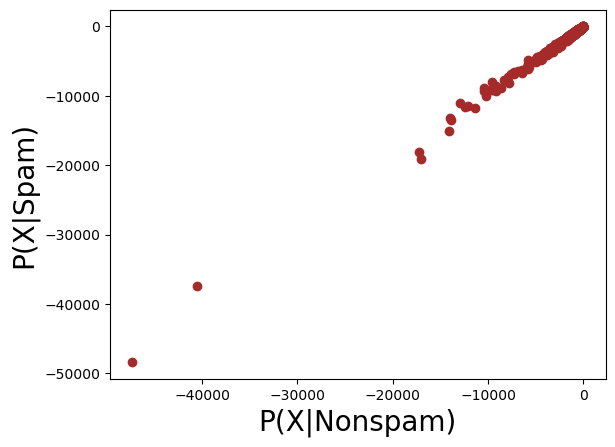

In [35]:
#plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=20)
plt.ylabel(yaxis_label, fontsize=20)
plt.scatter(joint_log_ham, joint_log_spam, color='brown')
plt.show()

In [36]:
linedata = np.linspace(-2000, 25, 1000)

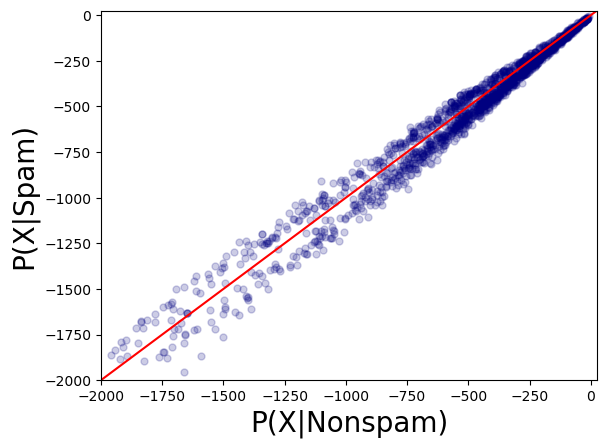

In [38]:
plt.xlim([-2000, 25])
plt.ylim([-2000, 25])
plt.xlabel(xaxis_label, fontsize=20)
plt.ylabel(yaxis_label, fontsize=20)
plt.plot(linedata, linedata, color ='red')
plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha = 0.2, s = 25)
plt.show()

In [39]:
sns.set_style('whitegrid')

In [43]:
summery_df = pd.DataFrame({yaxis_label : joint_log_spam, xaxis_label : joint_log_ham, labels : y_test})

In [44]:
summery_df

,P(X|Spam),P(X|Nonspam),Actual Category
0,-1220.381722,-1303.207527,1.0
1,-262.930240,-276.864977,1.0
2,-411.472500,-470.049718,1.0
3,-1472.995640,-1549.116619,1.0
4,-1239.772212,-1313.986625,1.0
...,...,...,...
1720,-431.900919,-400.467769,0.0
1721,-1998.848613,-2104.128585,0.0
1722,-875.971110,-787.160598,0.0
1723,-4803.476166,-4396.617777,0.0


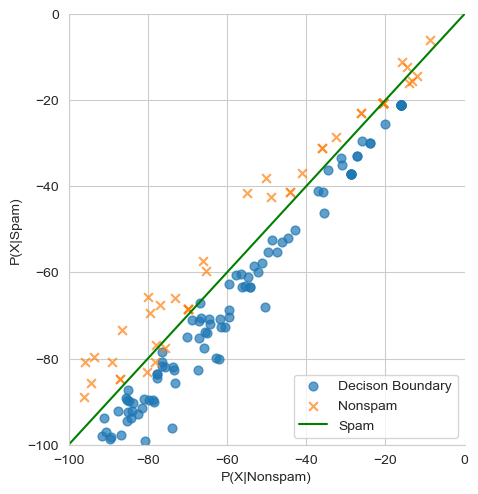

In [52]:
sns.lmplot(x=xaxis_label, y = yaxis_label, data = summery_df, fit_reg = False, hue = labels, height = 5, markers = ['o', 'x'], 
          legend = False, scatter_kws = {'alpha' : 0.7, 's' : 40})
plt.xlabel(xaxis_label)
plt.ylabel(yaxis_label)
plt.xlim(-100, 0)
plt.ylim(-100, 0)
plt.plot(linedata, linedata, c = 'green')
plt.legend(('Decison Boundary', 'Nonspam', 'Spam'), loc = 'lower right', fontsize = 10)
plt.show()

In [53]:
prediction.shape

(1725,)

In [54]:
np.unique(prediction, return_counts = True)

(array([False,  True]), array([1159,  566], dtype=int64))

In [57]:
true_pos = ((y_test ==1) & (prediction ==1))

In [59]:
true_pos.sum()

557

In [60]:
true_neg = ((y_test ==0) & (prediction ==0))
true_neg.sum()

1126

In [61]:
False_pos =  ((y_test ==0) & (prediction ==1))
False_pos.sum()

9

In [62]:
False_neg =  ((y_test ==1) & (prediction ==0))
False_neg.sum()

33

In [63]:
recall_score = true_pos.sum()/(true_pos.sum()+False_neg.sum())
recall_score*100

94.40677966101696

In [65]:
precision_score = true_pos.sum()/(true_pos.sum()+False_pos.sum())
precision_score*100

98.40989399293287

In [66]:
f1_score = (precision_score*recall_score)/(precision_score+recall_score)*2

In [68]:
f1_score*100

96.36678200692042